In [2]:
# import lirarires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy import stats

In [3]:
# dataset
hmc = pd.read_csv('application_train.csv')
hmc.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
hmc.shape

(307511, 122)

In [5]:
hmc.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
hmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
hmc.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
# menghilangkan data kosong
hmc_clear = hmc.dropna()
hmc_clear.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [9]:
hmc_clear.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,-2299.091374,...,0.009998,0.000581,0.001046,0.000233,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,2077.178768,...,0.099493,0.024104,0.032331,0.015247,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,-3132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,-1680.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,-817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000


In [10]:
hmc_clear.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.015474,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,-0.006509,0.006310,-0.011304,...,0.022281,0.003473,-0.005464,0.006155,-0.010707,0.001187,-0.007661,-0.010726,-0.008949,-0.017236
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,...,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
CNT_CHILDREN,0.005075,-0.019993,1.000000,-0.023069,-0.015191,-0.020395,-0.021157,-0.025688,0.175747,0.014600,...,-0.010280,-0.012527,-0.006602,-0.011857,-0.009919,-0.002712,-0.001043,-0.023803,-0.022028,-0.035499
AMT_INCOME_TOTAL,-0.011396,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.354556,0.211133,-0.119206,-0.028260,...,0.041473,0.010493,0.003233,0.031045,0.026559,-0.001641,0.024093,0.024042,0.006707,-0.007158
AMT_CREDIT,-0.013768,-0.014634,-0.015191,0.348575,1.000000,0.751587,0.987994,0.110804,-0.198152,-0.068760,...,0.061362,0.044737,0.073881,0.016894,0.007742,0.018995,0.012926,0.056718,0.003209,-0.057768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001187,0.014616,-0.002712,-0.001641,0.018995,0.014015,0.019636,-0.006398,0.018687,0.025302,...,0.005988,-0.001495,-0.002006,-0.000945,0.214817,1.000000,0.215462,-0.002107,-0.014587,0.003018
AMT_REQ_CREDIT_BUREAU_WEEK,-0.007661,0.015000,-0.001043,0.024093,0.012926,0.026397,0.014701,-0.000075,0.003329,0.004644,...,-0.007608,-0.004512,-0.006055,-0.002853,0.021885,0.215462,1.000000,-0.012199,-0.043595,0.024866
AMT_REQ_CREDIT_BUREAU_MON,-0.010726,-0.004202,-0.023803,0.024042,0.056718,0.025826,0.053417,0.081290,-0.036862,-0.014233,...,-0.009728,-0.003885,-0.004528,-0.005364,0.013652,-0.002107,-0.012199,1.000000,-0.035314,-0.010767
AMT_REQ_CREDIT_BUREAU_QRT,-0.008949,0.016465,-0.022028,0.006707,0.003209,0.016595,0.004426,-0.024234,-0.014376,0.025230,...,-0.006256,-0.010430,-0.013997,-0.006595,0.000241,-0.014587,-0.043595,-0.035314,1.000000,0.088951


# SOAL NO. 1

# AMT INCOME TOTAL

In [13]:
ait = hmc_clear['AMT_INCOME_TOTAL']
pd.DataFrame(ait).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,8602.0,222872.414439,141420.41152,33750.0,135000.0,193500.0,270000.0,4500000.0


Titik Pusat Data

In [14]:
mean = np.mean(ait)
median = np.quantile(ait, 0.5)
mode = ait.mode()[0]

print('Mean :', mean)
print('Median :', median)
print('Modus :', mode)

Mean : 222872.41443850266
Median : 193500.0
Modus : 225000.0


Persebaran Data

In [15]:
var = np.var(ait)
std = np.std(ait)
skew = scipy.stats.skew(ait)
q1, q2, q3 = np.quantile(ait, [0.25, 0.5, 0.75])
rng = np.max(ait) - np.min(ait)

print('Variansi :', var)
print('Standar Deviasi :', std)
print('Skewness :', skew)
print('Q1 :', q1)
print('Q2 :', q2)
print('Q3 :', q3)
print('Rentang :', rng)

Variansi : 19997407784.84667
Standar Deviasi : 141412.19107575793
Skewness : 6.515428426320833
Q1 : 135000.0
Q2 : 193500.0
Q3 : 270000.0
Rentang : 4466250.0


Distribusi Data

C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


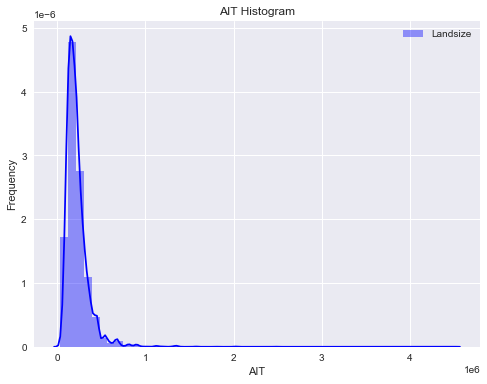

In [16]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.distplot(ait, color='blue', label='AIT')
plt.xlabel('AIT')
plt.ylabel('Frequency')
plt.title('AIT Histogram')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Insight : Terdapat banyak orang yang memiliki income < 1.000.0000 dan hanya sedikit yng memiliki income > 1.000.000

In [81]:
ait.to_excel('Nomor Satu_AIT.xlsx', index=False)

# AMT CREDIT

In [17]:
ac = hmc_clear['AMT_CREDIT']
pd.DataFrame(ac).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,8602.0,699998.701639,464911.858971,45000.0,315000.0,585000.0,958144.5,4050000.0


Titik Pusat Data

In [18]:
mean = np.mean(ac)
median = np.quantile(ac, 0.5)
mode = ac.mode()[0]

print('Mean :', mean)
print('Median :', median)
print('Modus :', mode)

Mean : 699998.7016391536
Median : 585000.0
Modus : 450000.0


Persebaran Data 

In [19]:
ar = np.var(ac)
std = np.std(ac)
skew = scipy.stats.skew(ac)
q1, q2, q3 = np.quantile(ac, [0.25, 0.5, 0.75])
rng = np.max(ac) - np.min(ac)

print('Variansi :', var)
print('Standar Deviasi :', std)
print('Skewness :', skew)
print('Q1 :', q1)
print('Q2 :', q2)
print('Q3 :', q3)
print('Rentang :', rng)

Variansi : 19997407784.84667
Standar Deviasi : 464884.83471114724
Skewness : 1.1534281779256703
Q1 : 315000.0
Q2 : 585000.0
Q3 : 958144.5
Rentang : 4005000.0


Distribusi Data

C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


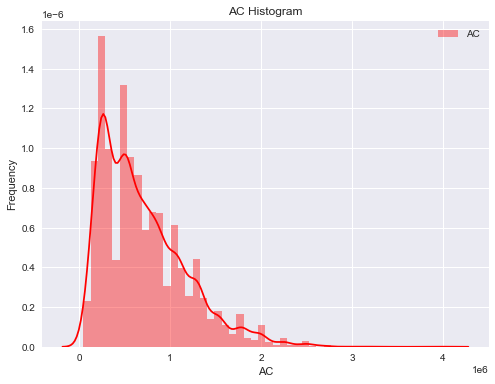

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.distplot(ac, color='red', label='AC')
plt.xlabel('AC')
plt.ylabel('Frequency')
plt.title('AC Histogram')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Insight : Terdapat banyak orang yang menggunakan credit < 2.000.0000 dan hanya sedikit yng menggunakan credit > 2.000.000

In [85]:
ac.to_excel('Nomor Satu_AC.xlsx', index=False)

# SOAL NO. 2

In [21]:
q1 = hmc_clear['DAYS_EMPLOYED'].quantile(0.25)
q3 = hmc_clear['DAYS_EMPLOYED'].quantile(0.75)

iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

print('Batas Bawah :', lower)
print('Batas Atas :', upper)

Batas Bawah : -6605.75
Batas Atas : 2656.25


In [23]:
outliers = hmc_clear[(hmc_clear['DAYS_EMPLOYED']>upper) | (hmc_clear['DAYS_EMPLOYED']<lower)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 296 to 304743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 411.3+ KB


In [24]:
print('Total Outliers :', outliers['DAYS_EMPLOYED'].count())

Total Outliers : 428


C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


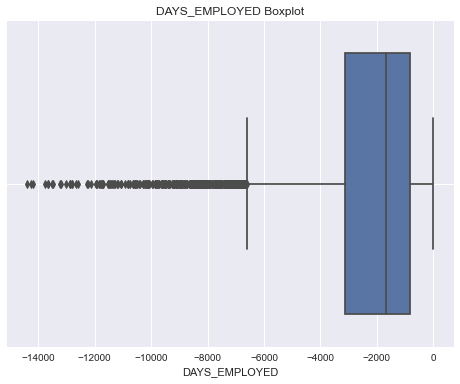

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(hmc_clear['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED Boxplot')
plt.xlabel('DAYS_EMPLOYED')
plt.grid(True)
plt.show()

In [ ]:
Insight : Terdapat 428 data ouliers di luar batas bawah dari kumpulan data

In [86]:
outliers.to_excel('Nomor Dua_Outliers.xlsx', index=False)

# SOAL NO. 3

# Days Birth

In [30]:
db = hmc_clear['DAYS_BIRTH']
pd.DataFrame(db).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DAYS_BIRTH,8602.0,-14189.009416,3259.202657,-24835.0,-16299.75,-13883.5,-11664.5,-7715.0


C:\Users\marif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


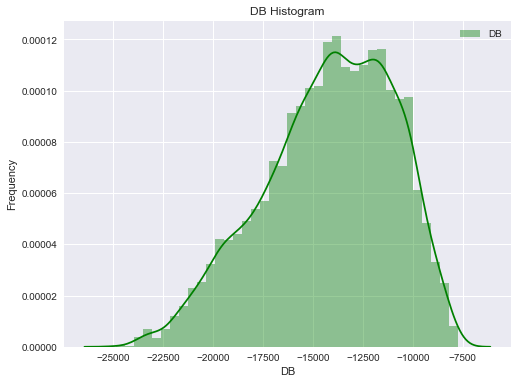

In [31]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
sns.distplot(db, color='green', label='DB')
plt.xlabel('DB')
plt.ylabel('Frequency')
plt.title('DB Histogram')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Insight : Terdapat sejumlah orang yang 'days_birth' antara -7500 sampai -20000 dan sedikit yang -20000 sampai -25000

In [87]:
db.to_excel('Nomor Tiga_DB.xlsx', index=False)

# SOAL NO. 4

In [77]:
gat = hmc_clear[['DAYS_BIRTH', 'TARGET']]
gat.head(10)

,DAYS_BIRTH,TARGET
71,-15406,0
124,-16282,0
152,-11375,0
161,-13972,0
255,-11356,1
296,-20348,0
298,-10935,0
316,-14882,0
323,-14768,0
328,-18831,0


In [88]:
gat.to_excel('Nomor Empat_gat.xlsx', index=False)

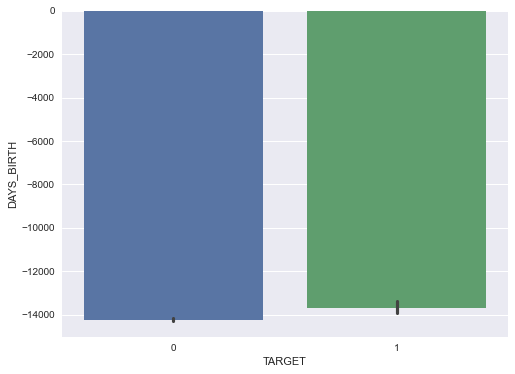

In [80]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'TARGET', y = 'DAYS_BIRTH', data = hmc_clear)
plt.xticks(rotation = 0)
plt.show()

# SOAL NO. 5

In [32]:
cor_hmc = hmc_clear[['NAME_INCOME_TYPE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'TARGET']]
cor_hmc.head()

,NAME_INCOME_TYPE,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
71,Working,-15406,2,0
124,Working,-16282,2,0
152,Commercial associate,-11375,2,0
161,Commercial associate,-13972,2,0
255,Commercial associate,-11356,1,1


In [39]:
corr_target = cor_hmc.corr(method='spearman')
corr_target

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
DAYS_BIRTH,1.000000,0.044893,0.044087
REGION_RATING_CLIENT_W_CITY,0.044893,1.000000,0.061140
TARGET,0.044087,0.061140,1.000000


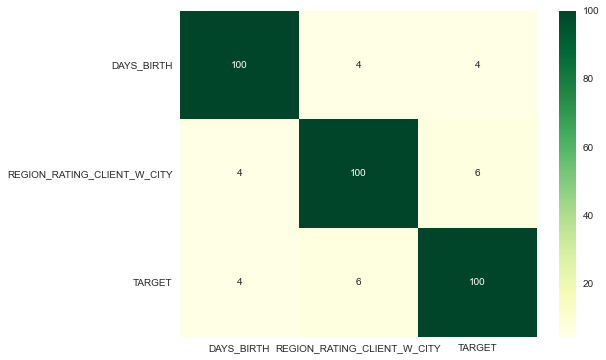

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_target*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

In [ ]:
Insight : Dari grafik di atas, fitur 'REGION_RATING_CLIENT_W_CITY' yang paling berkorelasi dengan 'TARGET'. Sehingga rating dari suatu region sangat menentukan jumlah target yang akan didapatkan.

In [89]:
cor_hmc.to_excel('Nomor Lima_corr.xlsx', index=False)

# SOAL NO. 6

In [40]:
cprice = hmc_clear[hmc_clear['AMT_INCOME_TOTAL'] > hmc_clear['AMT_INCOME_TOTAL'].mean()]
cprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 255 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 3.3+ MB


In [43]:
name = cprice.groupby('NAME_INCOME_TYPE').mean().sort_values('AMT_INCOME_TOTAL', ascending = False)['AMT_INCOME_TOTAL']
name = name.reset_index()
name

,NAME_INCOME_TYPE,AMT_INCOME_TOTAL
0,Commercial associate,347904.497024
1,State servant,316195.998288
2,Working,310972.716837


In [44]:
print('AMT_INCOME_TOTAL Rata-Rata : ', cprice['AMT_INCOME_TOTAL'].mean())
print('Total NAME_INCOME_TYPE : ', cprice['NAME_INCOME_TYPE'].count())

AMT_INCOME_TOTAL Rata-Rata :  327050.6455997758
Total NAME_INCOME_TYPE :  3568


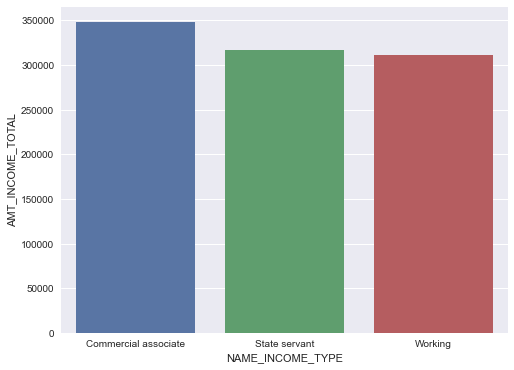

In [46]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data = name)
plt.xticks(rotation = 0)
plt.show()

Insight : Commercial Associate memiliki income paling tinggi sekitar 3.500.000 dibandingkan dengan yang lainnya 

Tiga NAME_EDUCATION_TYPE yang memiliki rata-rata salary tertinggi

In [49]:
edu = cprice.groupby('NAME_EDUCATION_TYPE').mean().sort_values('AMT_INCOME_TOTAL', ascending = False)['AMT_INCOME_TOTAL']
edu = edu.reset_index()
edu.head(3)

,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL
0,Academic degree,483750.000000
1,Higher education,351332.590248
2,Incomplete higher,312653.660221


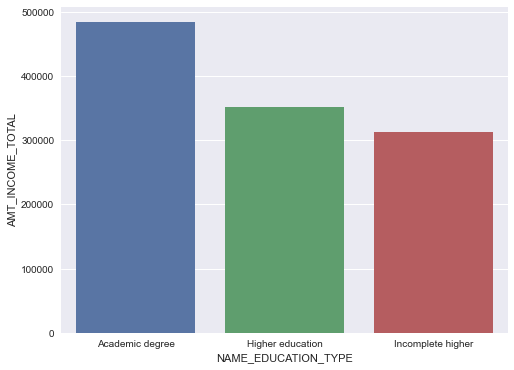

In [51]:
plt.figure(figsize = (8,6))
sns.barplot(x = edu['NAME_EDUCATION_TYPE'].head(3), y = 'AMT_INCOME_TOTAL', data = edu)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
Insight : Diketahui tiga NAME_EDUCATION_TYPE memiliki income paling tinggi yang bisa dilihat dari grafik

Lima tipe pekerjaan (OCCUPATION_TYPE) yang memiliki rata-rata salary tertinggi

In [64]:
occ = cprice.groupby('OCCUPATION_TYPE').mean().sort_values('AMT_INCOME_TOTAL', ascending = False)['AMT_INCOME_TOTAL']
occ = occ.reset_index()
occ.head(5)

,OCCUPATION_TYPE,AMT_INCOME_TOTAL
0,IT staff,464750.000000
1,Managers,378356.159263
2,Accountants,327682.616667
3,Core staff,318043.218550
4,High skill tech staff,308249.031873


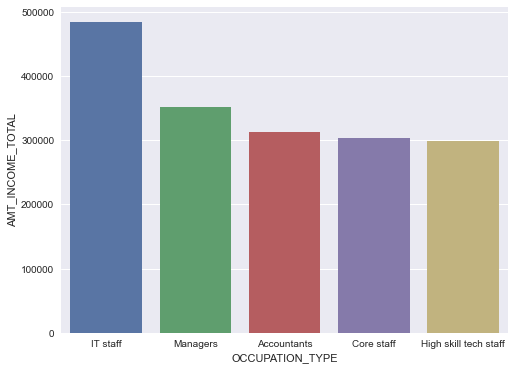

In [65]:
plt.figure(figsize = (8,6))
sns.barplot(x = occ['OCCUPATION_TYPE'].head(5), y = 'AMT_INCOME_TOTAL', data = edu)
plt.xticks(rotation = 0)
plt.show()

Insight : Diketahui lima OCCUPATION_TYPE memiliki income paling tinggi yang bisa dilihat dari grafik

Tiga status perkawinan (NAME_FAMILY_STATUS) yang paling sering dilakukan

In [72]:
stt = cprice['NAME_FAMILY_STATUS'].mode()

print('Status Perkawinan Yang Paling Sering Adalah ', stt)

Status Perkawinan Yang Paling Sering Adalah  0    Married
dtype: object


In [67]:
stt = cprice.groupby('NAME_FAMILY_STATUS').mean().sort_values('AMT_INCOME_TOTAL', ascending = False)['AMT_INCOME_TOTAL']
stt = stt.reset_index()
stt

,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL
0,Separated,344277.631579
1,Widow,334943.181818
2,Civil marriage,328369.144737
3,Married,326067.879808
4,Single / not married,322569.063508


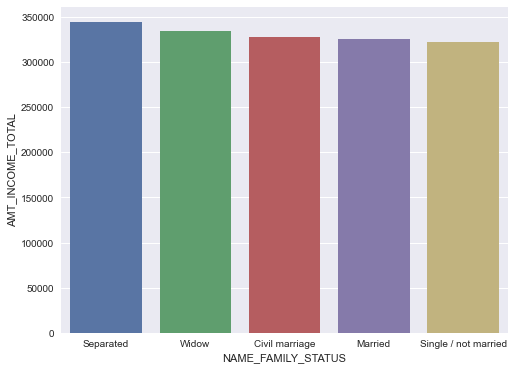

In [71]:
plt.figure(figsize = (8,6))
sns.barplot(x = stt['NAME_FAMILY_STATUS'].head(), y = 'AMT_INCOME_TOTAL', data = stt)
plt.xticks(rotation = 0)
plt.show()

Insight : Diketahui tipe NAME_FAMILY_STATUS memiliki income paling tinggi yang bisa dilihat dari grafik

In [90]:
cprice.to_excel('Nomor Enam_cprice.xlsx', index=False)